In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import math

In [2]:
dt_train=r'D:/AI & Data Science/Python/Project 3/counterfeit_train.csv'
dt_test=r'D:/AI & Data Science/Python/Project 3/counterfeit_test.csv'
cd_train=pd.read_csv(dt_train)
cd_test=pd.read_csv(dt_test)

In [3]:
cd_train.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [4]:
cd_train.dtypes

Medicine_ID             object
Counterfeit_Weight     float64
DistArea_ID             object
Active_Since             int64
Medicine_MRP           float64
Medicine_Type           object
SidEffect_Level         object
Availability_rating    float64
Area_Type               object
Area_City_Type          object
Area_dist_level         object
Counterfeit_Sales      float64
dtype: object

In [5]:
cd_train.shape

(6818, 12)

In [6]:
cd_test.shape

(1705, 11)

In [7]:
cd_train.isnull().sum()

Medicine_ID               0
Counterfeit_Weight     1166
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales         0
dtype: int64

In [8]:
cd_train['Medicine_ID'].nunique() #drop

1557

In [9]:
cd_train['Counterfeit_Weight'].nunique()

414

In [10]:
cd_train['Counterfeit_Weight'].isnull().sum() #replace with mean

1166

In [11]:
cd_train['DistArea_ID'].nunique() #dummy variable-9

10

In [12]:
cd_train['DistArea_ID'].value_counts()

Area017    760
Area046    749
Area013    749
Area035    748
Area049    739
Area045    736
Area027    735
Area018    729
Area010    442
Area019    431
Name: DistArea_ID, dtype: int64

In [13]:
cd_train['Active_Since'].nunique() #dummy variable-8

9

In [14]:
cd_train['Active_Since'].value_counts()

1983    1166
2005     760
1995     749
1985     749
2002     748
1997     739
2000     736
2007     729
1996     442
Name: Active_Since, dtype: int64

In [15]:
cd_train['Medicine_MRP'].nunique() #as it is

5097

In [16]:
cd_train['Medicine_Type'].nunique() #dummy variable

16

In [17]:
cd_train['Medicine_Type'].value_counts()

Hreplacements         976
Antibiotics           970
Antiseptics           724
OralContraceptives    694
Antipyretics          536
Cardiac               522
Mstablizers           514
Tranquilizers         420
Analgesics            356
Antimalarial          339
Antacids              206
Statins               167
MuscleRelaxants       139
Antifungal            111
Stimulants             95
Antiviral              49
Name: Medicine_Type, dtype: int64

In [18]:
cd_train['SidEffect_Level'].nunique() #dummy or boolean

2

In [19]:
cd_train['SidEffect_Level'].value_counts()

mild        4434
critical    2384
Name: SidEffect_Level, dtype: int64

In [20]:
cd_train['Availability_rating'].nunique() #as it is

6317

In [21]:
cd_train['Area_Type'].nunique() #dummy variable

4

In [22]:
cd_train['Area_Type'].value_counts()

DownTown              4481
MidTownResidential     873
CityLimits             735
Industrial             729
Name: Area_Type, dtype: int64

In [23]:
cd_train['Area_City_Type'].nunique() #dummy variable

3

In [24]:
cd_train['Area_City_Type'].value_counts()

Tier 3    2655
Tier 2    2244
Tier 1    1919
Name: Area_City_Type, dtype: int64

In [25]:
cd_train['Area_dist_level'].nunique() #dummy variable

4

In [26]:
cd_train['Area_dist_level'].value_counts()

Medium     2203
Unknown    1938
Small      1928
High        749
Name: Area_dist_level, dtype: int64

In [27]:
cd_test.isnull().sum()

Medicine_ID              0
Counterfeit_Weight     297
DistArea_ID              0
Active_Since             0
Medicine_MRP             0
Medicine_Type            0
SidEffect_Level          0
Availability_rating      0
Area_Type                0
Area_City_Type           0
Area_dist_level          0
dtype: int64

In [3]:
for col in ['Medicine_ID']:
    cd_train.drop([col],1,inplace=True)
    cd_test.drop([col],1,inplace=True)

In [4]:
cd_train['Counterfeit_Weight'].fillna(cd_train['Counterfeit_Weight'].mean(),inplace = True)
cd_test['Counterfeit_Weight'].fillna(cd_test['Counterfeit_Weight'].mean(),inplace = True)

In [5]:
cd_train['SidEffect_Level']=np.where(cd_train['SidEffect_Level']=='mild',1,0)
cd_test['SidEffect_Level']=np.where(cd_test['SidEffect_Level']=='mild',1,0)

In [6]:
DistArea_ID_dummies=pd.get_dummies(cd_train['DistArea_ID'],prefix="DistID")

In [7]:
DistArea_ID_dummies.head()

,DistID_Area010,DistID_Area013,DistID_Area017,DistID_Area018,DistID_Area019,DistID_Area027,DistID_Area035,DistID_Area045,DistID_Area046,DistID_Area049
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0


In [8]:
cd_train=pd.concat([cd_train,DistArea_ID_dummies],1)
cd_train=cd_train.drop(['DistArea_ID','DistID_Area049'],1)

In [9]:
DistArea_ID_dummies=pd.get_dummies(cd_test['DistArea_ID'],prefix="DistID")
cd_test=pd.concat([cd_test,DistArea_ID_dummies],1)
cd_test=cd_test.drop(['DistArea_ID','DistID_Area049'],1)

In [10]:
Active_Since_dummies=pd.get_dummies(cd_train['Active_Since'],prefix="Active_Since")
Active_Since_dummies.head()

,Active_Since_1983,Active_Since_1985,Active_Since_1995,Active_Since_1996,Active_Since_1997,Active_Since_2000,Active_Since_2002,Active_Since_2005,Active_Since_2007
0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0


In [11]:
cd_train=pd.concat([cd_train,Active_Since_dummies],1)
cd_train=cd_train.drop(['Active_Since','Active_Since_2007'],1)

In [12]:
Active_Since_dummies=pd.get_dummies(cd_test['Active_Since'],prefix="Active_Since")
cd_test=pd.concat([cd_test,Active_Since_dummies],1)
cd_test=cd_test.drop(['Active_Since','Active_Since_2007'],1)

In [13]:
Medicine_Type_dummies=pd.get_dummies(cd_train['Medicine_Type'],prefix="Medicine_Type")
Medicine_Type_dummies.head()

,Medicine_Type_Analgesics,Medicine_Type_Antacids,Medicine_Type_Antibiotics,Medicine_Type_Antifungal,Medicine_Type_Antimalarial,Medicine_Type_Antipyretics,Medicine_Type_Antiseptics,Medicine_Type_Antiviral,Medicine_Type_Cardiac,Medicine_Type_Hreplacements,Medicine_Type_Mstablizers,Medicine_Type_MuscleRelaxants,Medicine_Type_OralContraceptives,Medicine_Type_Statins,Medicine_Type_Stimulants,Medicine_Type_Tranquilizers
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [14]:
cd_train=pd.concat([cd_train,Medicine_Type_dummies],1)
cd_train=cd_train.drop(['Medicine_Type','Medicine_Type_Tranquilizers'],1)

In [15]:
Medicine_Type_dummies=pd.get_dummies(cd_test['Medicine_Type'],prefix="Medicine_Type")
cd_test=pd.concat([cd_test,Medicine_Type_dummies],1)
cd_test=cd_test.drop(['Medicine_Type','Medicine_Type_Tranquilizers'],1)

In [16]:
Area_Type_dummies=pd.get_dummies(cd_train['Area_Type'],prefix="Area_Type")
Area_Type_dummies.head()

,Area_Type_CityLimits,Area_Type_DownTown,Area_Type_Industrial,Area_Type_MidTownResidential
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,1


In [17]:
cd_train=pd.concat([cd_train,Area_Type_dummies],1)
cd_train=cd_train.drop(['Area_Type','Area_Type_MidTownResidential'],1)

In [18]:
Area_Type_dummies=pd.get_dummies(cd_test['Area_Type'],prefix="Area_Type")
cd_test=pd.concat([cd_test,Area_Type_dummies],1)
cd_test=cd_test.drop(['Area_Type','Area_Type_MidTownResidential'],1)

In [19]:
Area_City_Type_dummies=pd.get_dummies(cd_train['Area_City_Type'],prefix="Area_City_Type")
Area_City_Type_dummies.head()

,Area_City_Type_Tier 1,Area_City_Type_Tier 2,Area_City_Type_Tier 3
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [20]:
cd_train=pd.concat([cd_train,Area_City_Type_dummies],1)
cd_train=cd_train.drop(['Area_City_Type','Area_City_Type_Tier 3'],1)

In [21]:
Area_City_Type_dummies=pd.get_dummies(cd_test['Area_City_Type'],prefix="Area_City_Type")
cd_test=pd.concat([cd_test,Area_City_Type_dummies],1)
cd_test=cd_test.drop(['Area_City_Type','Area_City_Type_Tier 3'],1)

In [22]:
Area_dist_level_dummies=pd.get_dummies(cd_train['Area_dist_level'],prefix="Area_dist_level")
Area_dist_level_dummies.head()

,Area_dist_level_High,Area_dist_level_Medium,Area_dist_level_Small,Area_dist_level_Unknown
0,0,0,1,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [23]:
cd_train=pd.concat([cd_train,Area_dist_level_dummies],1)
cd_train=cd_train.drop(['Area_dist_level','Area_dist_level_Unknown'],1)

In [24]:
Area_dist_level_dummies=pd.get_dummies(cd_test['Area_dist_level'],prefix="Area_dist_level")
cd_test=pd.concat([cd_test,Area_dist_level_dummies],1)
cd_test=cd_test.drop(['Area_dist_level','Area_dist_level_Unknown'],1)

In [25]:
cd_train.head()

,Counterfeit_Weight,Medicine_MRP,SidEffect_Level,Availability_rating,Counterfeit_Sales,DistID_Area010,DistID_Area013,DistID_Area017,DistID_Area018,DistID_Area019,...,Medicine_Type_Statins,Medicine_Type_Stimulants,Area_Type_CityLimits,Area_Type_DownTown,Area_Type_Industrial,Area_City_Type_Tier 1,Area_City_Type_Tier 2,Area_dist_level_High,Area_dist_level_Medium,Area_dist_level_Small
0,13.100000,160.2366,0,0.070422,1775.5026,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,14.115057,110.4384,1,0.013000,3069.1520,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,9.025000,259.4092,1,0.060783,2603.0920,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,11.800000,99.9830,1,0.065555,1101.7130,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,14.115057,56.4402,0,0.248859,158.9402,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [26]:
cd_train.dtypes

Counterfeit_Weight                  float64
Medicine_MRP                        float64
SidEffect_Level                       int32
Availability_rating                 float64
Counterfeit_Sales                   float64
DistID_Area010                        uint8
DistID_Area013                        uint8
DistID_Area017                        uint8
DistID_Area018                        uint8
DistID_Area019                        uint8
DistID_Area027                        uint8
DistID_Area035                        uint8
DistID_Area045                        uint8
DistID_Area046                        uint8
Active_Since_1983                     uint8
Active_Since_1985                     uint8
Active_Since_1995                     uint8
Active_Since_1996                     uint8
Active_Since_1997                     uint8
Active_Since_2000                     uint8
Active_Since_2002                     uint8
Active_Since_2005                     uint8
Medicine_Type_Analgesics        

In [27]:
cd_test.head()

,Counterfeit_Weight,Medicine_MRP,SidEffect_Level,Availability_rating,DistID_Area010,DistID_Area013,DistID_Area017,DistID_Area018,DistID_Area019,DistID_Area027,...,Medicine_Type_Statins,Medicine_Type_Stimulants,Area_Type_CityLimits,Area_Type_DownTown,Area_Type_Industrial,Area_City_Type_Tier 1,Area_City_Type_Tier 2,Area_dist_level_High,Area_dist_level_Medium,Area_dist_level_Small
0,14.328604,85.5328,1,0.112747,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,13.450000,257.1460,1,0.144446,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,7.100000,98.1172,1,0.144221,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,18.300000,135.3730,1,0.100388,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14.328604,112.8016,1,0.022585,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import KFold
%matplotlib inline
from sklearn.metrics import roc_auc_score
import sklearn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [28]:
bd_train, bd_test = train_test_split(cd_train, test_size = 0.2,random_state=2)

In [29]:
x_train=bd_train.drop(['Counterfeit_Sales'],1)
y_train=bd_train['Counterfeit_Sales']
x_test=bd_test.drop(['Counterfeit_Sales'],1)
y_test=bd_test['Counterfeit_Sales']

In [55]:
lm=LinearRegression()

In [56]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
p_test=lm.predict(x_test)

residual=p_test-y_test

rmse_lm=np.sqrt(np.dot(residual,residual)/len(p_test))

rmse_lm

1132.8342638011886

In [58]:
MAE=mean_absolute_error(y_test,p_test)
MAE

830.050146841315

In [59]:
Score=1-(MAE/1660)
Score

0.4999697910594487

In [60]:
r2_score(p_test,y_test)

0.18276366063437222

In [61]:
coefs=lm.coef_
coefs

array([  -4.7618425 ,   15.42650404,    1.47837725, -273.65566359,
       -559.41039281,   65.47282428,   52.90575607,  -87.03198339,
       -682.99024261,  750.68197368,  159.67689449,  -34.23654999,
        356.32363053,   67.69173107,   65.47282428,  356.32363053,
       -559.41039281,  -21.39191025,  -34.23654999,  159.67689449,
         52.90575607,   65.67860936,   69.87977084,  142.79023665,
         68.40991994,   78.84271607,   14.29605233,   48.38037597,
        433.88984089,  153.48422512,   43.99165549,   62.58148889,
        176.69541934,   75.91240477,  137.12903772,  113.20203417,
        750.68197368,  578.75064513,  -87.03198339, -348.05852233,
        178.34610058,   65.47282428,  642.25808003, -166.98971759])

In [62]:
lm.intercept_

-727.2278989707233

In [63]:
features=x_train.columns
list(zip(features,coefs))

[('Counterfeit_Weight', -4.761842500980413),
 ('Medicine_MRP', 15.426504040886124),
 ('SidEffect_Level', 1.4783772546201015),
 ('Availability_rating', -273.6556635897964),
 ('DistID_Area010', -559.4103928084863),
 ('DistID_Area013', 65.47282427507274),
 ('DistID_Area017', 52.90575607426339),
 ('DistID_Area018', -87.0319833935351),
 ('DistID_Area019', -682.990242608833),
 ('DistID_Area027', 750.6819736773297),
 ('DistID_Area035', 159.6768944917089),
 ('DistID_Area045', -34.236549986524246),
 ('DistID_Area046', 356.3236305295913),
 ('Active_Since_1983', 67.69173106849645),
 ('Active_Since_1985', 65.47282427507506),
 ('Active_Since_1995', 356.3236305295909),
 ('Active_Since_1996', -559.410392808491),
 ('Active_Since_1997', -21.391910250576636),
 ('Active_Since_2000', -34.23654998652447),
 ('Active_Since_2002', 159.67689449170797),
 ('Active_Since_2005', 52.90575607426417),
 ('Medicine_Type_Analgesics', 65.67860936360616),
 ('Medicine_Type_Antacids', 69.87977083787172),
 ('Medicine_Type_An

In [64]:
# Finding best value of penalty weight with cross validation for ridge regression
alphas=np.linspace(1,10,100)
# We need to reset index for cross validation to work without hitch
x_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)

In [70]:
rmse_list=[]
for a in alphas:
    ridge = Ridge(fit_intercept=True, alpha=a)

    # computing average RMSE across 10-fold cross validation
    kf = KFold(n_splits=10)
    xval_err = 0
    for train_index, test_index in kf.split(x_train):
#         print(test_index.shape)
        X_train, X_test = x_train.iloc[train_index], x_train.iloc[test_index]
        Y_train, Y_test = y_train.iloc[train_index], y_train.iloc[test_index]
        ridge.fit(X_train,Y_train)
        p = ridge.predict(X_test)
        err = p - Y_test
        xval_err += np.sqrt(np.dot(err,err)/len(X_test))
#         print(xval_err)
    rmse_10cv = np.sqrt(xval_err/kf.n_splits)
    # uncomment below to print rmse values for individidual alphas
    print('{:.3f}\t {:.6f}\t '.format(a,rmse_10cv))
    rmse_list.extend([rmse_10cv])
best_alpha=alphas[rmse_list==min(rmse_list)]
print('Alpha with min 10cv error is : ',best_alpha )

1.000	 33.382177	 
1.091	 33.382094	 
1.182	 33.382012	 
1.273	 33.381930	 
1.364	 33.381850	 
1.455	 33.381770	 
1.545	 33.381692	 
1.636	 33.381614	 
1.727	 33.381537	 
1.818	 33.381461	 
1.909	 33.381386	 
2.000	 33.381311	 
2.091	 33.381238	 
2.182	 33.381165	 
2.273	 33.381093	 
2.364	 33.381022	 
2.455	 33.380951	 
2.545	 33.380881	 
2.636	 33.380812	 
2.727	 33.380743	 
2.818	 33.380676	 
2.909	 33.380609	 
3.000	 33.380542	 
3.091	 33.380476	 
3.182	 33.380411	 
3.273	 33.380347	 
3.364	 33.380283	 
3.455	 33.380220	 
3.545	 33.380157	 
3.636	 33.380095	 
3.727	 33.380033	 
3.818	 33.379973	 
3.909	 33.379912	 
4.000	 33.379852	 
4.091	 33.379793	 
4.182	 33.379735	 
4.273	 33.379676	 
4.364	 33.379619	 
4.455	 33.379562	 
4.545	 33.379505	 
4.636	 33.379449	 
4.727	 33.379393	 
4.818	 33.379338	 
4.909	 33.379284	 
5.000	 33.379229	 
5.091	 33.379176	 
5.182	 33.379122	 
5.273	 33.379070	 
5.364	 33.379017	 
5.455	 33.378965	 
5.545	 33.378914	 
5.636	 33.378863	 
5.727	 33.37

In [71]:
ridge=Ridge(fit_intercept=True,alpha=best_alpha)

ridge.fit(x_train,y_train)

p_test=ridge.predict(x_test)

residual=p_test-y_test

rmse_ridge=np.sqrt(np.dot(residual,residual)/len(p_test))

rmse_ridge

1132.0408822953655

In [72]:
MAE=mean_absolute_error(y_test,p_test)
MAE

828.9669827690674

In [73]:
Score=1-(MAE/1660)
Score

0.5006222995367064

In [74]:
list(zip(x_train.columns,ridge.coef_))

[('Counterfeit_Weight', -4.764886518194794),
 ('Medicine_MRP', 15.428773458557595),
 ('SidEffect_Level', -2.125402021056202),
 ('Availability_rating', -173.57782619740294),
 ('DistID_Area010', -556.2474916309405),
 ('DistID_Area013', 65.02777123838746),
 ('DistID_Area017', 52.644570936693135),
 ('DistID_Area018', -86.30509573581683),
 ('DistID_Area019', -676.1889359341482),
 ('DistID_Area027', 744.2372379115773),
 ('DistID_Area035', 158.44002177036919),
 ('DistID_Area045', -33.36274704630654),
 ('DistID_Area046', 351.4409805585449),
 ('Active_Since_1983', 68.04830197730529),
 ('Active_Since_1985', 65.02777123838588),
 ('Active_Since_1995', 351.44098055854613),
 ('Active_Since_1996', -556.2474916309108),
 ('Active_Since_1997', -19.686312068234272),
 ('Active_Since_2000', -33.36274704629096),
 ('Active_Since_2002', 158.44002177031504),
 ('Active_Since_2005', 52.644570936709755),
 ('Medicine_Type_Analgesics', 30.718274689315553),
 ('Medicine_Type_Antacids', 32.979767280097576),
 ('Medicin

In [75]:
alphas=np.linspace(0.00001,.01,100)
rmse_list=[]
for a in alphas:
    lasso = Lasso(fit_intercept=True, alpha=a,max_iter=10000)

    # computing RMSE using 10-fold cross validation
    kf = KFold(n_splits=10)
    xval_err = 0
    for train_index, test_index in kf.split(x_train):
#         print(test_index.shape)
        X_train, X_test = x_train.iloc[train_index], x_train.iloc[test_index]
        Y_train, Y_test = y_train.iloc[train_index], y_train.iloc[test_index]
        lasso.fit(X_train,Y_train)
        p = lasso.predict(X_test)
        err = p - Y_test
        xval_err += np.sqrt(np.dot(err,err)/len(X_test))
    rmse_10cv = np.sqrt(xval_err/len(x_train))
    rmse_list.extend([rmse_10cv])
    # Uncomment below to print rmse values of individual alphas
    print('{:.5f}\t {:.6f}\t '.format(a,rmse_10cv))
best_alpha=alphas[rmse_list==min(rmse_list)]
print('Alpha with min 10cv error is : ',best_alpha )

0.00001	 1.429453	 
0.00011	 1.429453	 
0.00021	 1.429453	 
0.00031	 1.429453	 
0.00041	 1.429453	 
0.00051	 1.429453	 
0.00062	 1.429453	 
0.00072	 1.429453	 
0.00082	 1.429453	 
0.00092	 1.429453	 
0.00102	 1.429453	 
0.00112	 1.429453	 
0.00122	 1.429453	 
0.00132	 1.429453	 
0.00142	 1.429452	 
0.00152	 1.429452	 
0.00162	 1.429452	 
0.00173	 1.429452	 
0.00183	 1.429452	 
0.00193	 1.429452	 
0.00203	 1.429452	 
0.00213	 1.429452	 
0.00223	 1.429452	 
0.00233	 1.429452	 
0.00243	 1.429452	 
0.00253	 1.429452	 
0.00263	 1.429452	 
0.00273	 1.429452	 
0.00284	 1.429452	 
0.00294	 1.429452	 
0.00304	 1.429452	 
0.00314	 1.429452	 
0.00324	 1.429452	 
0.00334	 1.429452	 
0.00344	 1.429452	 
0.00354	 1.429451	 
0.00364	 1.429451	 
0.00374	 1.429451	 
0.00384	 1.429451	 
0.00395	 1.429451	 
0.00405	 1.429451	 
0.00415	 1.429451	 
0.00425	 1.429451	 
0.00435	 1.429451	 
0.00445	 1.429451	 
0.00455	 1.429451	 
0.00465	 1.429451	 
0.00475	 1.429451	 
0.00485	 1.429451	 
0.00495	 1.429451	 


KeyboardInterrupt: 

In [ ]:
lasso=Lasso(fit_intercept=True,alpha=best_alpha)

lasso.fit(x_train,y_train)

p_test=lasso.predict(x_test)

residual=p_test-y_test

rmse_lasso=np.sqrt(np.dot(residual,residual)/len(p_test))

rmse_lasso

In [ ]:
MAE=mean_absolute_error(y_test,p_test)
MAE

In [ ]:
Score=1-(MAE/1660)
Score

In [ ]:
list(zip(x_train.columns,lasso.coef_))

In [ ]:
SidEffect_Level,Availability_rating,DistID_Area013,DistID_Area017,DistID_Area018,DistID_Area046,Active_Since_1983,
Active_Since_1985,Active_Since_1995,Active_Since_1996,Active_Since_1997,Medicine_Type_Analgesics,Medicine_Type_Antacids,
Medicine_Type_Antifungal,Medicine_Type_Antimalarial,Medicine_Type_Antiseptics,Medicine_Type_Antiviral,Medicine_Type_Mstablizers,
Medicine_Type_MuscleRelaxants,Medicine_Type_OralContraceptives,Medicine_Type_Statins,Medicine_Type_Stimulants,
Area_Type_Industrial,Area_City_Type_Tier 1,Area_City_Type_Tier 2,Area_dist_level_High,Area_dist_level_Small

In [201]:
for col in ['SidEffect_Level','Availability_rating','DistID_Area013','DistID_Area017','DistID_Area018','DistID_Area046',
            'Active_Since_1983','Active_Since_1985','Active_Since_1995','Active_Since_1996','Active_Since_1997',
            'Medicine_Type_Analgesics','Medicine_Type_Antacids','Medicine_Type_Antifungal','Medicine_Type_Antimalarial',
            'Medicine_Type_Antiseptics','Medicine_Type_Antiviral','Medicine_Type_Mstablizers','Medicine_Type_MuscleRelaxants',
            'Medicine_Type_OralContraceptives','Medicine_Type_Statins','Medicine_Type_Stimulants','Area_Type_Industrial',
            'Area_City_Type_Tier 1','Area_City_Type_Tier 2','Area_dist_level_High','Area_dist_level_Small']:
    cd_train.drop([col],1,inplace=True)
    cd_test.drop([col],1,inplace=True)

In [202]:
bd_train, bd_test = train_test_split(cd_train, test_size = 0.2,random_state=2)

In [203]:
x_train=bd_train.drop(['Counterfeit_Sales'],1)
y_train=bd_train['Counterfeit_Sales']
x_test=bd_test.drop(['Counterfeit_Sales'],1)
y_test=bd_test['Counterfeit_Sales']

In [204]:
lm=LinearRegression()

lm.fit(x_train,y_train)

p_test=lm.predict(x_test)

residual=p_test-y_test

rmse_lm=np.sqrt(np.dot(residual,residual)/len(p_test))

rmse_lm

1131.398343466989

In [205]:
MAE=mean_absolute_error(y_test,p_test)
MAE

828.0819065035519

In [206]:
Score=1-(MAE/1660)
Score

0.5011554780099086

In [207]:
r2_score(p_test,y_test)

0.18425800579261697

In [208]:
coefs=lm.coef_
coefs

array([   -4.70023393,    15.4277747 , -1522.45485751, -1528.35749399,
         871.91989041,    67.5733135 ,   -42.25644848,   -42.25644848,
          67.5733135 ,    86.41872445,    69.32024784,   -59.799884  ,
          80.7471455 ,   -28.66114684,   871.91989041,   385.96630974,
          79.3331525 ])

In [209]:
lm.intercept_

-286.712275230434

In [210]:
features=x_train.columns
list(zip(features,coefs))

[('Counterfeit_Weight', -4.700233925328349),
 ('Medicine_MRP', 15.427774701897402),
 ('DistID_Area010', -1522.4548575059937),
 ('DistID_Area019', -1528.3574939940302),
 ('DistID_Area027', 871.9198904069782),
 ('DistID_Area035', 67.57331349762131),
 ('DistID_Area045', -42.25644848171269),
 ('Active_Since_2000', -42.25644848171428),
 ('Active_Since_2002', 67.57331349762151),
 ('Active_Since_2005', 86.41872444632662),
 ('Medicine_Type_Antibiotics', 69.32024783771237),
 ('Medicine_Type_Antipyretics', -59.79988399728084),
 ('Medicine_Type_Cardiac', 80.74714550217428),
 ('Medicine_Type_Hreplacements', -28.66114683638331),
 ('Area_Type_CityLimits', 871.9198904069787),
 ('Area_Type_DownTown', 385.9663097449209),
 ('Area_dist_level_Medium', 79.33315250158594)]

In [30]:
#decision tree
from sklearn import tree
import pydotplus

In [31]:
x_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)

In [58]:
dtree=tree.DecisionTreeRegressor(criterion="mse",max_leaf_nodes=10)
#class_weight="balanced"

In [59]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=10, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [60]:
dtree

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=10, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [61]:
dot_data = tree.export_graphviz(dtree,out_file=None,
                     feature_names=x_train.columns,
                    class_names=["0","1"],
                     proportion=True)

In [62]:
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

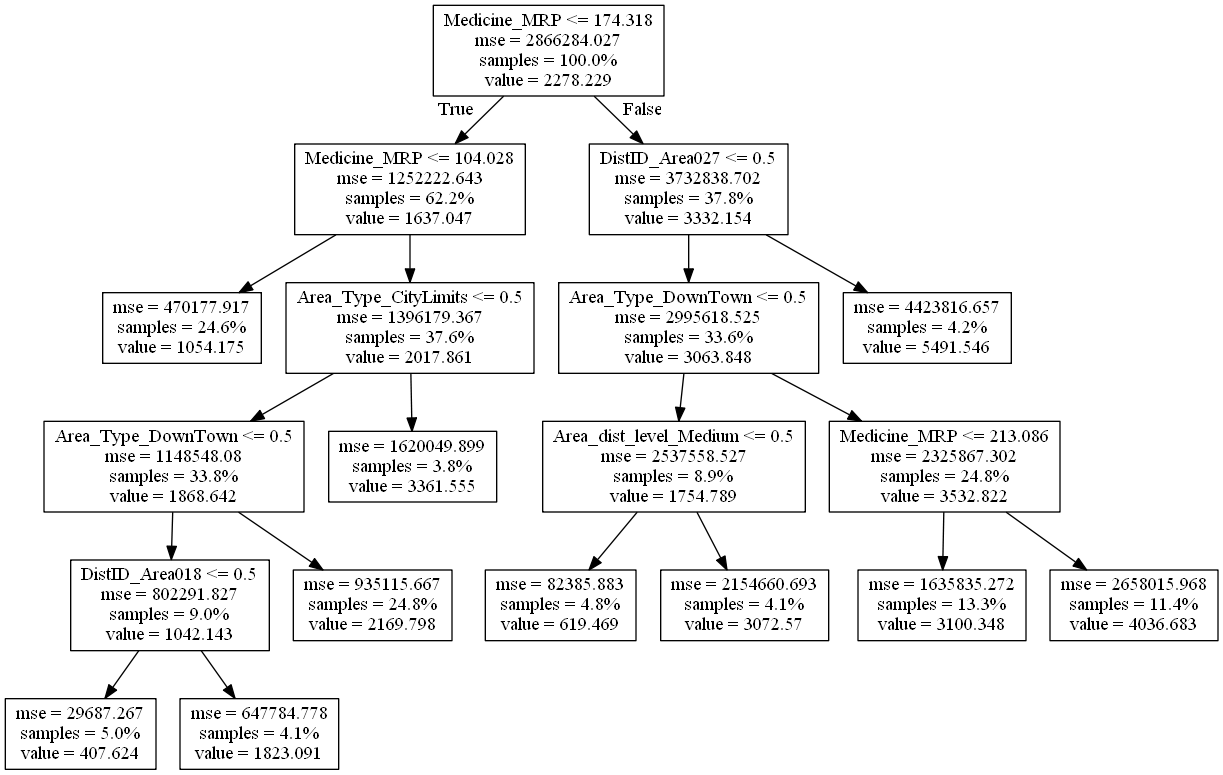

In [63]:
# Show graph
from IPython.display import Image  
Image(graph.create_png())

In [68]:
p_test=dtree.predict(x_test)

residual=p_test-y_test

rmse_lm=np.sqrt(np.dot(residual,residual)/len(p_test))

rmse_lm

1158.5490987432092

In [69]:
MAE=mean_absolute_error(y_test,p_test)
MAE

837.0875135665601

In [70]:
Score=1-(MAE/1660)
Score

0.4957304135141204

In [71]:
r2_score(p_test,y_test)

0.13781164666034884

In [32]:
from sklearn.ensemble import RandomForestRegressor
# help(RandomForestClassifier)
from time import time
from operator import itemgetter
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

In [33]:
# this here is the base classifier we are going to try
# we will be supplying different parameter ranges to our randomSearchCV which in turn
# will pass it on to this classifier

clf = RandomForestRegressor(verbose=1,n_jobs=-1)

In [34]:
# RandomSearchCV/GridSearchCV accept parameters values as dictionaries.
# In example given below we have constructed dictionary for 
#different parameter values that we want to
# try for randomForest model
param_dist = {"n_estimators":[10,100,500],
              "max_depth": [3,5, None],
              "max_features": sp_randint(5, 11),
              "min_samples_split": sp_randint(5, 11),
              "min_samples_leaf": sp_randint(5, 11),
              "bootstrap": [True, False],
              "criterion": ["mse","mae"]}

In [35]:
# run randomized search
n_iter_search = 10
# n_iter parameter of RandomizedSeacrhCV controls, how many 
# parameter combination will be tried; out of all possible given values

random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)
random_search.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 13.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_job

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=-1, oob_score=False,
                                                   random_...


In [36]:
# Utility function to report best scores. This simply accepts grid scores from 
# our randomSearchCV/GridSearchCV and picks and gives top few combination according to 
# their scores

def report(grid_scores, n_top=3):
    for i in range(1,(n_top+1)):
        print(i)
        candidates = np.flatnonzero(grid_scores['rank_test_score']==i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              grid_scores["mean_test_score"][candidate],
              np.std(grid_scores["std_test_score"][candidate])))
            print("Parameters: {0}".format(grid_scores["params"][candidate]))
            print("")
    
report(random_search.cv_results_)

1
Model with rank: 1
Mean validation score: 0.566 (std: 0.000)
Parameters: {'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 10}

2
Model with rank: 2
Mean validation score: 0.566 (std: 0.000)
Parameters: {'bootstrap': True, 'criterion': 'mae', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 9, 'min_samples_split': 8, 'n_estimators': 500}

3
Model with rank: 3
Mean validation score: 0.541 (std: 0.000)
Parameters: {'bootstrap': False, 'criterion': 'mae', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 10, 'min_samples_split': 9, 'n_estimators': 500}



In [37]:
rf=RandomForestRegressor(n_estimators=10,criterion='mse',min_samples_split=6,
                         bootstrap=True,max_depth=None,max_features=10,min_samples_leaf=5)

In [38]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=6,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [39]:
p_test=rf.predict(x_test)

residual=p_test-y_test

rmse_lm=np.sqrt(np.dot(residual,residual)/len(p_test))

rmse_lm

1129.017334375588

In [40]:
MAE=mean_absolute_error(y_test,p_test)
MAE

791.3945237379164

In [41]:
Score=1-(MAE/1660)
Score

0.5232563110012551

In [42]:
r2_score(p_test,y_test)

0.19616507879802725

In [56]:
final=rf.predict(cd_test)

In [61]:
dt_test=r'D:/AI & Data Science/Python/Project 3/counterfeit_test.csv'
cd_test_1=pd.read_csv(dt_test)

In [62]:
submission=pd.DataFrame(list(zip(cd_test_1['Medicine_ID'],list(final))),columns=['Medicine_ID','Counterfeit_Sales'])

In [64]:
submission.to_csv('Abhilash_Singh_P3_part2.csv',index=False)

In [44]:
import matplotlib.pyplot as plt

Feature ranking:
1. feature Counterfeit_Weight (0.495495)
2. feature Medicine_MRP (0.087158)
3. feature SidEffect_Level (0.067156)
4. feature Availability_rating (0.059030)
5. feature DistID_Area010 (0.055495)
6. feature DistID_Area013 (0.045563)
7. feature DistID_Area017 (0.033422)
8. feature DistID_Area018 (0.028280)
9. feature DistID_Area019 (0.024017)
10. feature DistID_Area027 (0.018234)
11. feature DistID_Area035 (0.016158)
12. feature DistID_Area045 (0.008139)
13. feature DistID_Area046 (0.006195)
14. feature Active_Since_1983 (0.005188)
15. feature Active_Since_1985 (0.004896)
16. feature Active_Since_1995 (0.004598)
17. feature Active_Since_1996 (0.004015)
18. feature Active_Since_1997 (0.003642)
19. feature Active_Since_2000 (0.002939)
20. feature Active_Since_2002 (0.002823)
21. feature Active_Since_2005 (0.002713)
22. feature Medicine_Type_Analgesics (0.002664)
23. feature Medicine_Type_Antacids (0.001932)
24. feature Medicine_Type_Antibiotics (0.001918)
25. feature Medicin

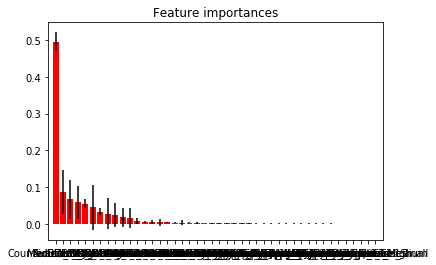

In [45]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, list(x_train.columns)[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), list(x_train.columns))
plt.xlim([-1, x_train.shape[1]])
plt.show()